# Phase One Project 
## Introduction: Overview

As Part of the company to venture into avaition Business, this project investigates the risk associated with different aircraft , aiming to identify the safest model for potention investment.The analysis focuses on determining which types of flights have the highest average fatalities and aircraft damage, assessing how engine types and weather conditions affect safety, and ranking aircraft make by risk level for commercial use.


The dataset used comes from the National Transportation Safety Board (NTSB) and includes records of aviation accidents and incidents from 1962 to 2023.The tools to be used in achieving this are:
       <ul>
           <li> Pandas - Data cleaning, transformation, and aggregation </li>
           <li> Numpy - Numerical computations</li>
           <li> Matplotlib / seaborn - Static visualizations for analysis validation</li>
           <li> Plotly - Interactive graphs for dynamic data exploration</li>
        </ul>


# Assumption

1. Aircraft with high fatality rates are costlier to operate due to legal liabilities, compensation claims, and higher insurance costs. 
2. Planes with a high damage index are more expensive to maintain or replace, as severe damage often makes repair uneconomical. 


# Problem Statement
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

# Goal
The Data Analysis goals are:
<ul>
    <li> Which flight types have the highest average fatalities and aircraft damage? </li>
    <li> What effect do engine types have on safety, and how is this affected by weather conditions?</li>
    <li> aircraft make and models have the lowest risk for commercial ventures?</li>
</ul>

# Steps
1.Define the problem statement.

2.Data Preperation

3.Aggregate and analyze the data to identify low-risk aircraft.

4.Create visualizations to support findings.

5.Translate findings into three actionable business recommendations.



## Step One: Data Preparation and Data Understanding
### 1. Importing necessary libraries
### 2. Loading the dataset
### 3. Exploring the data to understand it



In [31]:
#Load all the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

#Load data to a dataframe 
data = pd.read_csv("data/Aviation_Data.csv")
data

/tmp/ipykernel_9880/3216054291.py:9: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/Aviation_Data.csv")


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [32]:
#get the shape and size of the data 
print(data.shape, data.size)

(90348, 31) 2800788


In [33]:
# thia inspects all the columns in our dataset
data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [34]:
# look at the datatypes in our dataset
data.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [35]:
#Get an overview of our data.If there are missing values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [36]:
# check for missing data 
data.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

In [37]:
# check for dulplicated data 
data.duplicated().sum()

1390

In [38]:
# drop all duplicated data 

data.drop_duplicates(inplace=True)

In [39]:
# confirm there are no duplicates 
data.duplicated().sum()

0

Since there are some columns that Are not useful I will drop those columns 

In [40]:
data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [41]:
data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [ ]:
#Removing white spaces in the dataframe
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
data = data.apply(lambda x: x.str.replace(" ", "") if x.dtype == "object" else x)


In [43]:
df = data.drop(["Event.Date","Location", "Country", "Latitude", "Longitude", "Airport.Code",
       "Airport.Name","Report.Status","Publication.Date","Broad.phase.of.flight","Air.carrier","Schedule",
       "FAR.Description","Registration.Number"], axis = 1)


In [44]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition'],
      dtype='object')

In [45]:
missing_values = df.isna().sum()
missing_values.sort_values(ascending=False)

Aircraft.Category         56671
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Fatal.Injuries      11470
Engine.Type                7165
Purpose.of.flight          6261
Number.of.Engines          6153
Total.Uninjured            5981
Weather.Condition          4561
Aircraft.damage            3263
Injury.Severity            1069
Amateur.Built               171
Model                       161
Make                        132
Accident.Number              69
Event.Id                     69
Investigation.Type            0
dtype: int64

In [46]:
df

,Event.Id,Investigation.Type,Accident.Number,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,SEA87LA080,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,LAX94LA336,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,NYC07LA005,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,Accident,LAX96LA321,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,CHI79FA064,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,Minor,NaN,NaN,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN
90344,20221227106494,Accident,ERA23LA095,NaN,NaN,NaN,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
90345,20221227106497,Accident,WPR23LA075,Non-Fatal,Substantial,Airplane,AMERICANCHAMPIONAIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC
90346,20221227106498,Accident,WPR23LA076,NaN,NaN,NaN,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN


In [47]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88958 entries, 0 to 90347
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88958 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Injury.Severity         87889 non-null  object 
 4   Aircraft.damage         85695 non-null  object 
 5   Aircraft.Category       32287 non-null  object 
 6   Make                    88826 non-null  object 
 7   Model                   88797 non-null  object 
 8   Amateur.Built           88787 non-null  object 
 9   Number.of.Engines       82805 non-null  float64
 10  Engine.Type             81793 non-null  object 
 11  Purpose.of.flight       82697 non-null  object 
 12  Total.Fatal.Injuries    77488 non-null  float64
 13  Total.Serious.Injuries  76379 non-null  float64
 14  Total.Minor.Injuries    76956 non-null  flo

## Step Two: Data Analysing and Visualization
### 1. Aggregate and analyze the data to identify low-risk aircraft
### 2. Create visualizations to support findings.

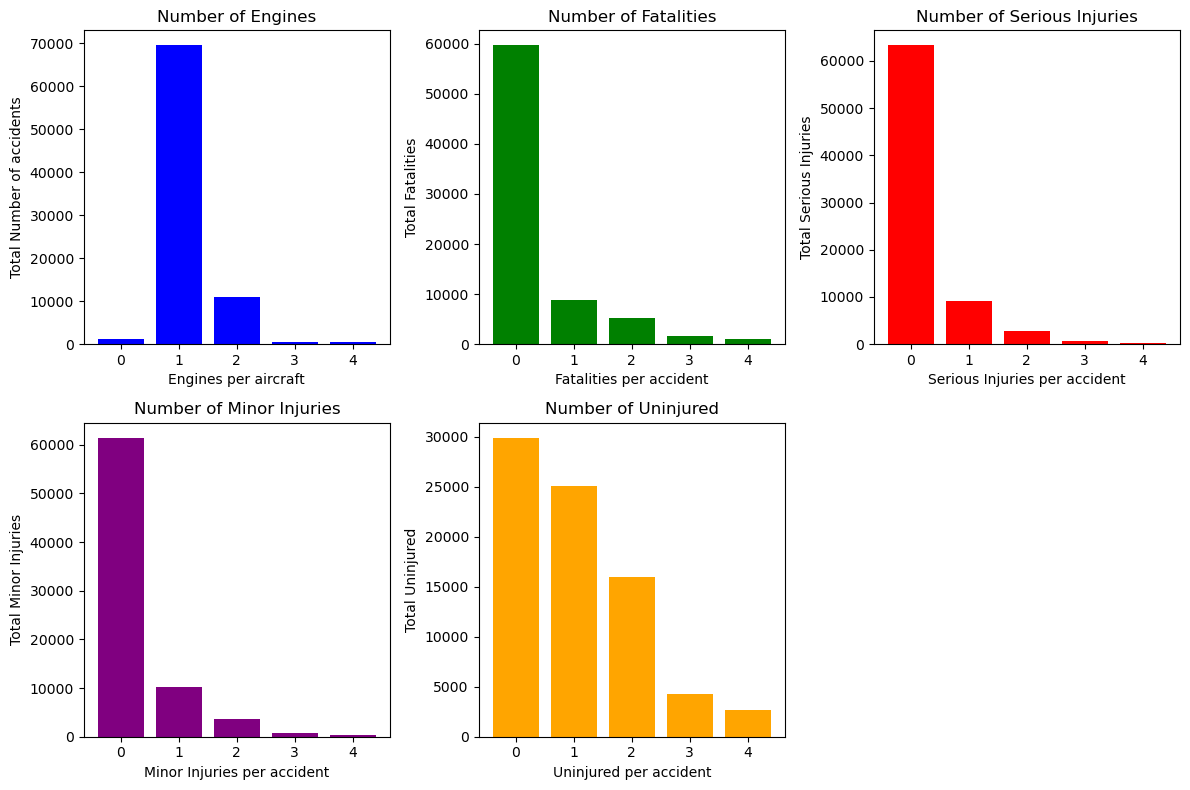

In [49]:

plt.figure(figsize=(12, 8))

# No of Engines
plt.subplot(2, 3, 1)
plt.bar(df["Number.of.Engines"].value_counts().index[0:5], df["Number.of.Engines"].value_counts().values[0:5], color="blue")
plt.title("Number of Engines")
plt.xlabel("Engines per aircraft")
plt.ylabel("Total Number of accidents")

# Fatalities
plt.subplot(2, 3, 2)
plt.bar(df["Total.Fatal.Injuries"].value_counts().index[0:5], df["Total.Fatal.Injuries"].value_counts().values[0:5], color="green")
plt.title("Number of Fatalities")
plt.xlabel("Fatalities per accident")
plt.ylabel("Total Fatalities")

# Serious
plt.subplot(2, 3, 3)
plt.bar(df["Total.Serious.Injuries"].value_counts().index[0:5], df["Total.Serious.Injuries"].value_counts().values[0:5], color="red")
plt.title("Number of Serious Injuries")
plt.xlabel("Serious Injuries per accident")
plt.ylabel("Total Serious Injuries")

# Minor
plt.subplot(2, 3, 4)
plt.bar(df["Total.Minor.Injuries"].value_counts().index[0:5], df["Total.Minor.Injuries"].value_counts().values[0:5], color="purple")
plt.title("Number of Minor Injuries")
plt.xlabel("Minor Injuries per accident")
plt.ylabel("Total Minor Injuries")

# Uninjured
plt.subplot(2, 3, 5)
plt.bar(df["Total.Uninjured"].value_counts().index[0:5], df["Total.Uninjured"].value_counts().values[0:5], color="orange")
plt.title("Number of Uninjured")
plt.xlabel("Uninjured per accident")
plt.ylabel("Total Uninjured")

plt.tight_layout() 
plt.show()

From the graph above its clearly that all the data have a positive skewed, so we will replace the null values with medium.We will do all this in all the columns but Total Injured.

In [50]:
#Replacing null values with median 

cols = ["Number.of.Engines", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]
for col in cols:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipykernel_9880/956387134.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [51]:
#verify there are no nulls
df.isna().sum().sort_values(ascending=True)

Investigation.Type            0
Total.Minor.Injuries          0
Total.Serious.Injuries        0
Number.of.Engines             0
Total.Uninjured               0
Event.Id                     69
Accident.Number              69
Make                        132
Model                       161
Amateur.Built               171
Injury.Severity            1069
Aircraft.damage            3263
Weather.Condition          4561
Purpose.of.flight          6261
Engine.Type                7165
Total.Fatal.Injuries      11470
Aircraft.Category         56671
dtype: int64

In [52]:
# Replacing NAN values with unkown for the following columns
df["Purpose.of.flight"].fillna(value = "Unknown", inplace=True)
df["Engine.Type"].fillna(value = "Unknown", inplace=True)
df["Engine.Type"] = df["Engine.Type"].map(lambda x: "Unkown" if x == "UNK" or x == "None" or x == "NONE" else x)
df["Aircraft.damage"].fillna(value = "Unknown", inplace=True)

# Replacing NAN values with UNK for unkown weather information and standardizing text strings
df["Weather.Condition"].fillna(value = "UNK", inplace=True)
df["Weather.Condition"] = df["Weather.Condition"].map(lambda x: "UNK" if x == "Unk" else x)


/tmp/ipykernel_9880/3048449977.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Purpose.of.flight"].fillna(value = "Unknown", inplace=True)
/tmp/ipykernel_9880/3048449977.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [53]:
df.isnull().sum().sort_values()

Weather.Condition             0
Investigation.Type            0
Total.Minor.Injuries          0
Total.Serious.Injuries        0
Aircraft.damage               0
Purpose.of.flight             0
Engine.Type                   0
Number.of.Engines             0
Total.Uninjured               0
Event.Id                     69
Accident.Number              69
Make                        132
Model                       161
Amateur.Built               171
Injury.Severity            1069
Total.Fatal.Injuries      11470
Aircraft.Category         56671
dtype: int64

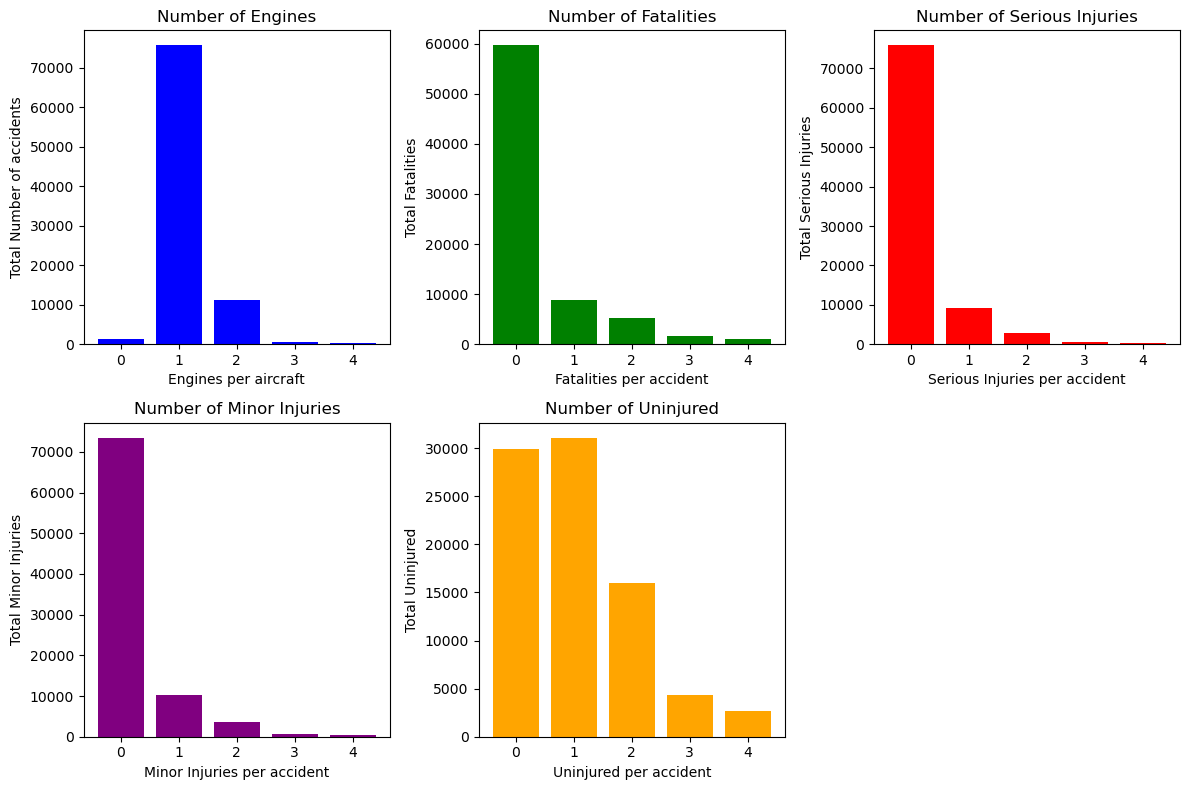

In [54]:
plt.figure(figsize=(12, 8))

# No of Engines
plt.subplot(2, 3, 1)
plt.bar(df["Number.of.Engines"].value_counts().index[0:5], df["Number.of.Engines"].value_counts().values[0:5], color="blue")
plt.title("Number of Engines")
plt.xlabel("Engines per aircraft")
plt.ylabel("Total Number of accidents")

# Fatalities
plt.subplot(2, 3, 2)
plt.bar(df["Total.Fatal.Injuries"].value_counts().index[0:5], df["Total.Fatal.Injuries"].value_counts().values[0:5], color="green")
plt.title("Number of Fatalities")
plt.xlabel("Fatalities per accident")
plt.ylabel("Total Fatalities")

# Serious
plt.subplot(2, 3, 3)
plt.bar(df["Total.Serious.Injuries"].value_counts().index[0:5], df["Total.Serious.Injuries"].value_counts().values[0:5], color="red")
plt.title("Number of Serious Injuries")
plt.xlabel("Serious Injuries per accident")
plt.ylabel("Total Serious Injuries")

# Minor
plt.subplot(2, 3, 4)
plt.bar(df["Total.Minor.Injuries"].value_counts().index[0:5], df["Total.Minor.Injuries"].value_counts().values[0:5], color="purple")
plt.title("Number of Minor Injuries")
plt.xlabel("Minor Injuries per accident")
plt.ylabel("Total Minor Injuries")

# Uninjured
plt.subplot(2, 3, 5)
plt.bar(df["Total.Uninjured"].value_counts().index[0:5], df["Total.Uninjured"].value_counts().values[0:5], color="orange")
plt.title("Number of Uninjured")
plt.xlabel("Uninjured per accident")
plt.ylabel("Total Uninjured")

plt.tight_layout() 
plt.show()

# Aggregate and analyze the data to identify low-risk aircraft.

### Goal 1: Which flight types have the highest average fatalities and aircraft damage?
    

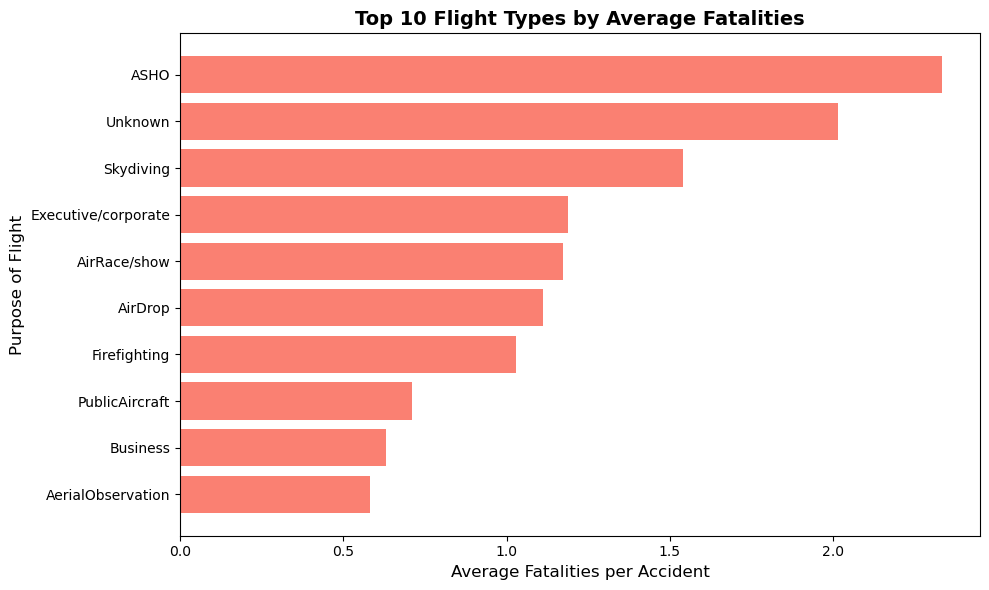

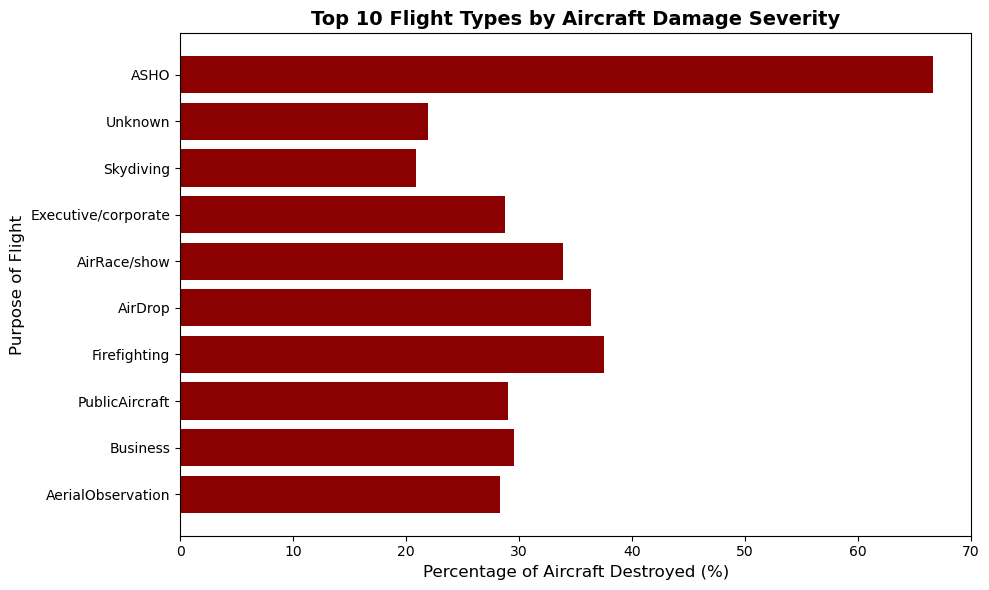

,Purpose.of.flight,avg_fatalities_per_accident,percent_destroyed
0,ASHO,2.333333,66.666667
25,Unknown,2.015381,21.916864
24,Skydiving,1.539474,20.879121
8,Executive/corporate,1.188867,28.752260
4,AirRace/show,1.172414,33.898305
3,AirDrop,1.111111,36.363636
11,Firefighting,1.027778,37.500000
20,PublicAircraft,0.709790,29.027778
7,Business,0.629730,29.517173
2,AerialObservation,0.581461,28.337531


In [55]:
# Fatalities Analysis
flight_stats = df.groupby("Purpose.of.flight").agg(
    total_accidents=("Total.Fatal.Injuries", "count"),
    total_fatalities=("Total.Fatal.Injuries", "sum")
).reset_index()

# Calculate average fatalities per accident
flight_stats["avg_fatalities_per_accident"] = (
    flight_stats["total_fatalities"] / flight_stats["total_accidents"]
)

#Damage Analysis
# Calculate proportion of destroyed aircraft for each flight type
damage_counts = df.groupby(["Purpose.of.flight", "Aircraft.damage"]).size().unstack(fill_value=0)
damage_counts["total"] = damage_counts.sum(axis=1)
damage_counts["percent_destroyed"] = (damage_counts["Destroyed"] / damage_counts["total"]) * 100

# Merge fatalities and damage stats
merged_stats = flight_stats.merge(
    damage_counts[["percent_destroyed"]], on="Purpose.of.flight", how="left"
).fillna(0)

# Sort by average fatalities
top10 = merged_stats.sort_values("avg_fatalities_per_accident", ascending=False).head(10)

# --- Visualization 1: Average Fatalities per Accident ---
plt.figure(figsize=(10,6))
plt.barh(top10["Purpose.of.flight"], top10["avg_fatalities_per_accident"], color="salmon")
plt.xlabel("Average Fatalities per Accident", fontsize=12)
plt.ylabel("Purpose of Flight", fontsize=12)
plt.title("Top 10 Flight Types by Average Fatalities", fontsize=14, weight="bold")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- Visualization 2: % Aircraft Destroyed by Flight Type ---
plt.figure(figsize=(10,6))
plt.barh(top10["Purpose.of.flight"], top10["percent_destroyed"], color="darkred")
plt.xlabel("Percentage of Aircraft Destroyed (%)", fontsize=12)
plt.ylabel("Purpose of Flight", fontsize=12)
plt.title("Top 10 Flight Types by Aircraft Damage Severity", fontsize=14, weight="bold")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Display merged table
display(top10[["Purpose.of.flight", "avg_fatalities_per_accident", "percent_destroyed"]])

## Insights form the graphs 

1. Skydiving ,Airdrop and Air rate have the highest fatality rates and aircraft destruction percentages. This means that they have a higher    operational risk.
2. Business and Executive/Corporate flights show moderate fatality averages and slightly lower destruction rates.Suggesting stronger safety oversight and maintenance.


## Goal 2: What effect do engine types have on safety, and how is this affected by weather conditions?
    

IMC (Instrument Meteorological Conditions) and VMC (Visual Meteorological Conditions) are aviation terms describing weather that affects flight. VMC is when weather is good enough for pilots to fly by visual reference, meeting specific minimums for visibility and cloud clearance. IMC is when weather conditions are poorer, falling below the VMC minimums and requiring pilots to navigate solely by their instruments. 

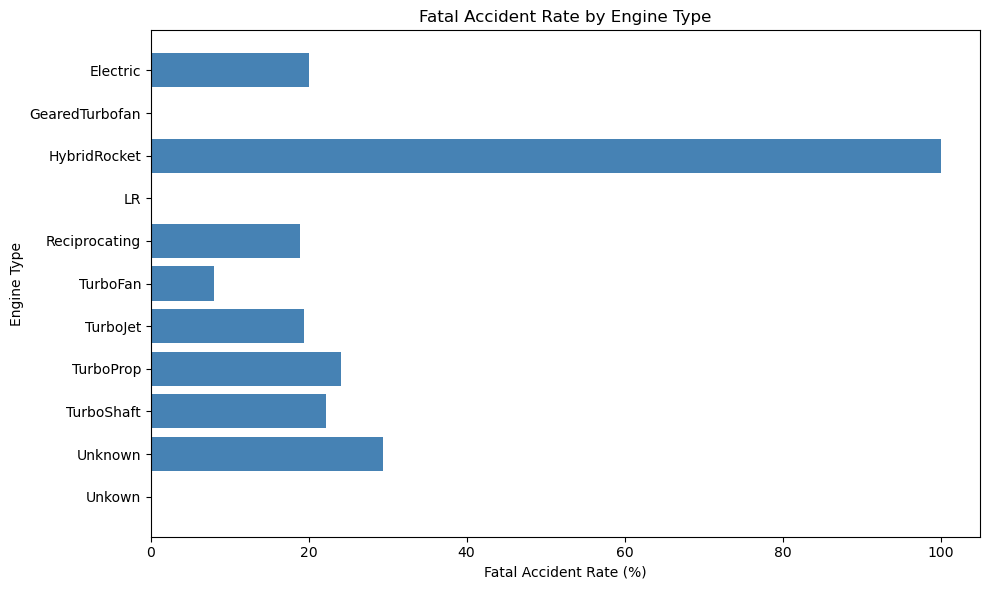

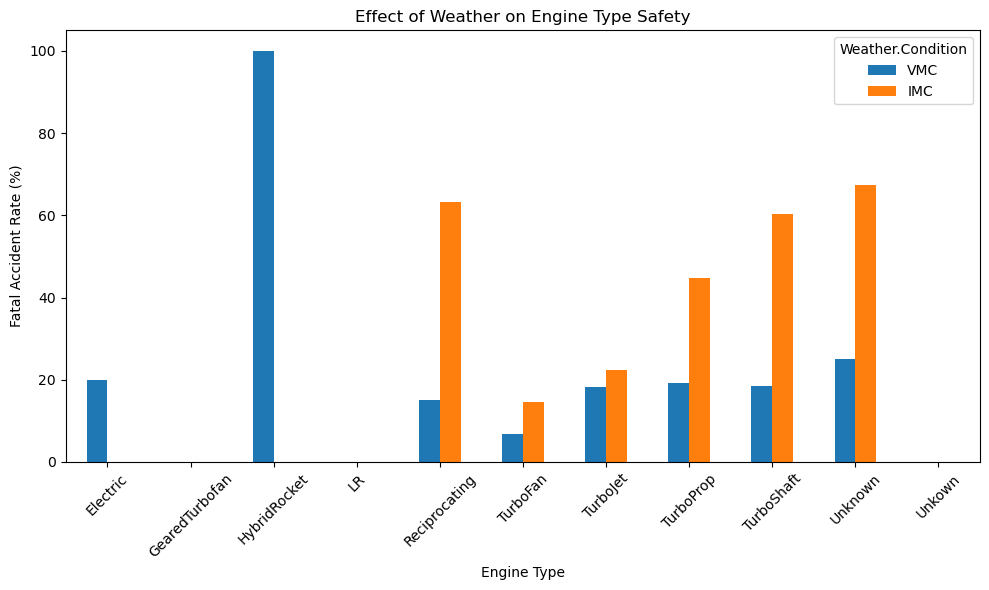

,Engine.Type,Weather.Condition,total_accidents,fatal_accidents,fatality_rate_%
3,HybridRocket,VMC,1,1,100.000000
20,Unknown,IMC,352,237,67.329545
6,Reciprocating,UNK,1023,678,66.275660
5,Reciprocating,IMC,4393,2773,63.123150
17,TurboShaft,IMC,234,141,60.256410
18,TurboShaft,UNK,126,60,47.619048
14,TurboProp,IMC,523,234,44.741874
15,TurboProp,UNK,133,58,43.609023
21,Unknown,UNK,4001,1264,31.592102
12,TurboJet,UNK,28,8,28.571429


In [56]:
# Define a column indicating whether an accident was fatal
df["Fatal"] = df["Total.Fatal.Injuries"].apply(lambda x: 1 if x > 0 else 0)

# Engine Type Safety Summary 
engine_stats = df.groupby("Engine.Type").agg(
    total_accidents=("Fatal", "count"),
    fatal_accidents=("Fatal", "sum")
).reset_index()

# Fatality rate per engine type
engine_stats["fatality_rate_%"] = (engine_stats["fatal_accidents"] / engine_stats["total_accidents"]) * 100

# Effect of Weather on Engine Type
engine_weather = df.groupby(["Engine.Type", "Weather.Condition"]).agg(
    total_accidents=("Fatal", "count"),
    fatal_accidents=("Fatal", "sum")
).reset_index()

engine_weather["fatality_rate_%"] = (engine_weather["fatal_accidents"] / engine_weather["total_accidents"]) * 100

#Visualization: Fatality Rate by Engine Type
plt.figure(figsize=(10,6))
plt.barh(engine_stats["Engine.Type"], engine_stats["fatality_rate_%"], color="steelblue")
plt.xlabel("Fatal Accident Rate (%)")
plt.ylabel("Engine Type")
plt.title("Fatal Accident Rate by Engine Type")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#Visualization: Weather vs Engine Type
pivot_weather = engine_weather.pivot(index="Engine.Type", columns="Weather.Condition", values="fatality_rate_%").fillna(0)

pivot_weather[["VMC","IMC"]].plot(kind="bar", figsize=(10,6))
plt.xlabel("Engine Type")
plt.ylabel("Fatal Accident Rate (%)")
plt.title("Effect of Weather on Engine Type Safety")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display summary table
display(engine_weather.sort_values("fatality_rate_%", ascending=False).head(10))

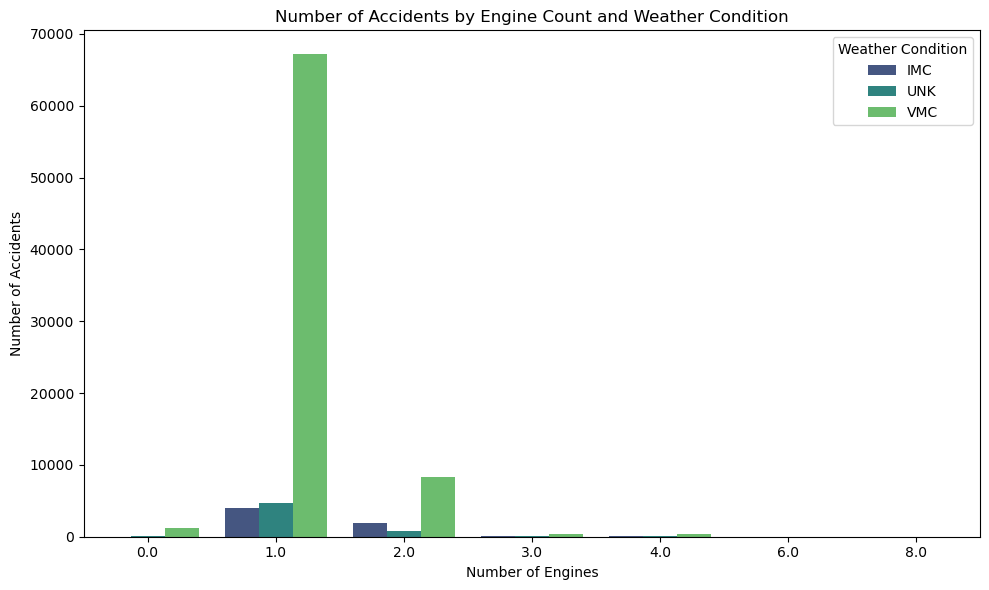

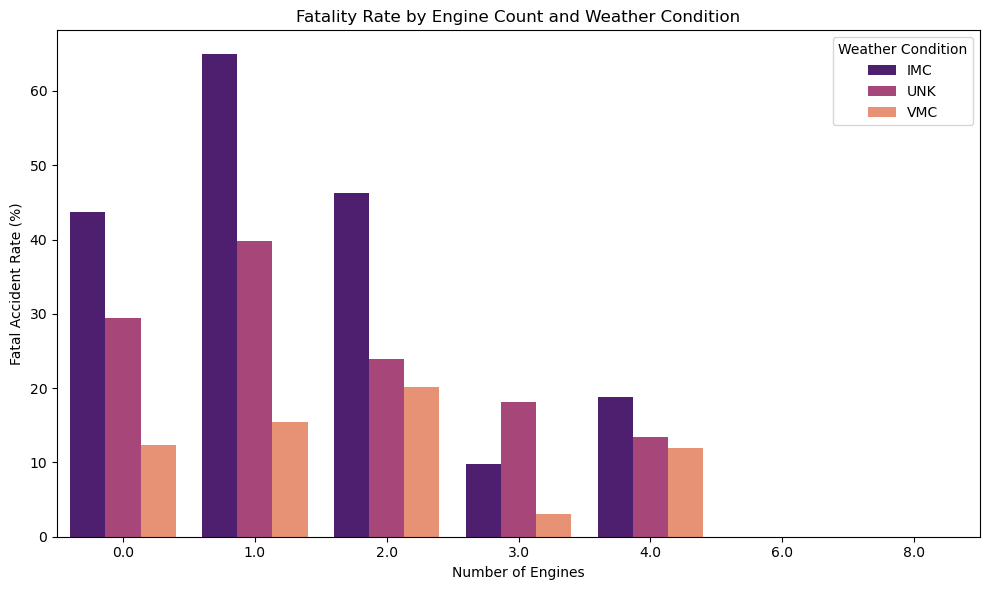

In [57]:
eng_weather_accidents = df.groupby(["Number.of.Engines", "Weather.Condition"]).agg(
    total_accidents=("Fatal", "count"),
    fatal_accidents=("Fatal", "sum")
).reset_index()

eng_weather_accidents["fatality_rate_%"] = (eng_weather_accidents["fatal_accidents"] / eng_weather_accidents["total_accidents"]) * 100

# Visualization: Total accidents by number of engines and weather
plt.figure(figsize=(10,6))
sns.barplot(data=eng_weather_accidents, x="Number.of.Engines", y="total_accidents", hue="Weather.Condition", palette="viridis")
plt.title("Number of Accidents by Engine Count and Weather Condition")
plt.xlabel("Number of Engines")
plt.ylabel("Number of Accidents")
plt.legend(title="Weather Condition")
plt.tight_layout()
plt.show()

# Visualization: Fatality rate by number of engines and weather
plt.figure(figsize=(10,6))
sns.barplot(data=eng_weather_accidents, x="Number.of.Engines", y="fatality_rate_%", hue="Weather.Condition", palette="magma")
plt.title("Fatality Rate by Engine Count and Weather Condition")
plt.xlabel("Number of Engines")
plt.ylabel("Fatal Accident Rate (%)")
plt.legend(title="Weather Condition")
plt.tight_layout()
plt.show()

The analysis reveals that reciprocating-engine aircraft experience the highest fatal accident rates, especially under Instrument Meteorological Conditions (IMC).

Turbofan,turbojet and turboprop engines tend to have lower fatality rates, likely due to more advanced systems and better-equipped aircraft.
Poor weather (IMC) amplifies risk across all engine types, but its effect is most severe for reciprocating aircraft and turboshaft aircraft, highlighting their vulnerability to adverse weather and limited instrument capability.

Aircraft with more engines and advanced engine types (turboprops, jets) are significantly safer, particularly in adverse weather.
For business or corporate operations, prioritizing twin-engine turboprop or jet aircraft minimizes operational risk.

In conlusion, weather conditions shows a positive correlation with fatalities and weather.Confirming that poor visibility and adverse weather significantly increase risk.

## Goal 3: What Aircraft models have the lowest risk for commercial ventures?


To answer this question we We will focus on flights where the purpose is Commercial,Air Taxi, Business and Executive/Corporate, since those represent business/commercial operations.Also we will only use airplanes used for commercial purposes.We will focus only on top 10 safest airplane makes and top 10 most risk airplane.

To ensure in the series, there are no duplicates , lets convert all the data in the series to uppercase 

In [61]:
df['Make'] = df['Make'].str.upper()

In [62]:
# Filter for only airplane-type aircraft
airplane_df = df[df["Aircraft.Category"].str.contains("Airplane", case=False, na=False)]

# Focus on commercial/business-related flights only
commercial_flights = airplane_df[
    airplane_df["Purpose.of.flight"].str.contains("Business|Executive|Corporate|Commercial", case=False, na=False)
]

# Group by Make
make_stats = commercial_flights.groupby("Make").agg(
    total_accidents=("Total.Fatal.Injuries", "count"),
    total_fatalities=("Total.Fatal.Injuries", "sum")
).reset_index()

# Calculate fatal accident rate
make_stats["fatal_accident_rate"] = make_stats["total_fatalities"] / make_stats["total_accidents"]

# Drop makes with very few accidents (less than 5) to reduce bias
make_stats = make_stats[make_stats["total_accidents"] >= 5]

# Get top 10 safest and riskiest
safest_makes = make_stats.sort_values("fatal_accident_rate", ascending=True).head(10)
riskiest_makes = make_stats.sort_values("fatal_accident_rate", ascending=False).head(10)

Lets create visual to see our findings 

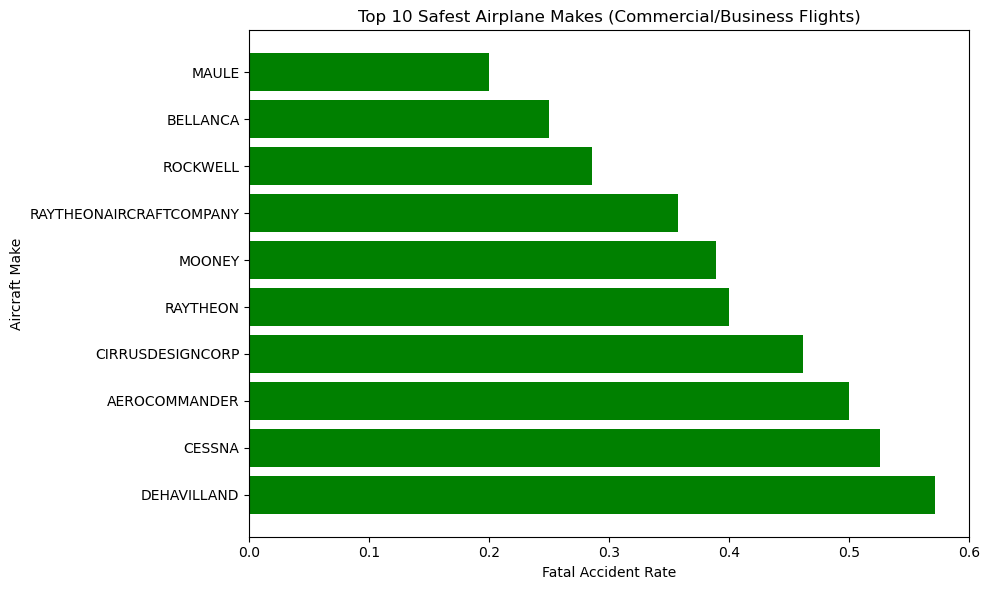

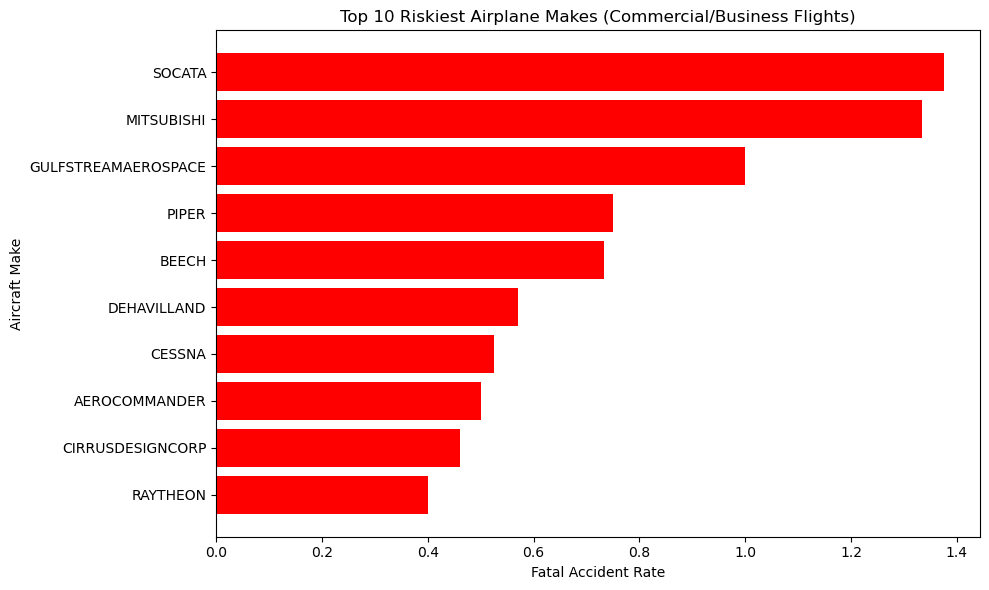

In [63]:
# Plot safest
plt.figure(figsize=(10,6))
plt.barh(safest_makes["Make"], safest_makes["fatal_accident_rate"], color="green")
plt.xlabel("Fatal Accident Rate")
plt.ylabel("Aircraft Make")
plt.title("Top 10 Safest Airplane Makes (Commercial/Business Flights)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plot riskiest
plt.figure(figsize=(10,6))
plt.barh(riskiest_makes["Make"], riskiest_makes["fatal_accident_rate"], color="red")
plt.xlabel("Fatal Accident Rate")
plt.ylabel("Aircraft Make")
plt.title("Top 10 Riskiest Airplane Makes (Commercial/Business Flights)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

From the chart, Bellanca, and Rockwell aircraft exhibit the lowest fatal accident rates, indicating a strong safety record in commercial operations. Manufacturers such as Raytheon Aircraft Company and Mooney also maintain relatively low fatality rates, suggesting dependable safety outcomes.SOCATA and Mitsubishi pose the greatest operational risk for commercial ventures,

### Conclusion and Recommendation 

1. Based on the data, skydiving, firefighting, and executive flights show the highest risk of fatalities and aerial application activities demonstrate the least risk.
2. The data suggests that a single-engine setup might be more conducive to surviving adverse weather conditions. The larger volume of data for single-engine aircraft likely contributes to its higher accuracy.I believe the dataset lacked enough data for multiple engine planes.
2. Begin operations with Executive/Corporate or Small Business Charter aircraft, where accident frequency and fatality rates are lower.
3. For commercial ventures prioritizing safety, aircraft from Maule, Bellanca, and Rockwell represent the lowest risk choices in this dataset.
Overall, consistent maintenance practices, pilot training, and operational oversight remain the key determinants of aviation safety, regardless of manufacturer.
4. Choosing aircraft with low fatality and damage rates helps reduce financial risk and improve profitability in commercial aviation.
5. Invest in pilot training programs, aircraft maintenance, and weather monitoring systems to make the airplane extra safe.

In [1]:
!jupyter nbconvert --to pdf Projoct1.ipynb


[NbConvertApp] Converting notebook Projoct1.ipynb to pdf
[NbConvertApp] Support files will be in Projoct1_files/
[NbConvertApp] Making directory ./Projoct1_files
[NbConvertApp] Writing 112867 bytes to notebook.tex
[NbConvertApp] Building PDF
Traceback (most recent call last):
  File "/home/magical/anaconda3/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
             ^^^^^^
  File "/home/magical/anaconda3/lib/python3.12/site-packages/jupyter_core/application.py", line 284, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/home/magical/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/magical/anaconda3/lib/python3.12/site-packages/nbconvert/nbconvertapp.py", line 420, in start
    self.convert_notebooks()
  File "/home/magical/anaconda3/lib/python3.12/site-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(noteb